# Evolución de la generación segun la epoca del año

In [28]:
import $ivy.`org.apache.spark::spark-sql:2.4.3`


import org.apache.spark.sql._
import org.apache.spark.sql.functions._
import org.apache.spark.sql.expressions.Window



//Reducir numero logs
import org.apache.log4j.{Level, Logger}
Logger.getLogger("org").setLevel(Level.OFF)


//For adding extra dependenies
import $ivy.`org.typelevel::cats-core:1.6.0`

//Plotly
import $ivy.`org.plotly-scala::plotly-almond:0.8.5`
import plotly._, plotly.element._, plotly.layout._, plotly.Almond._


//Iniciamos session de Spark
val spark = {
  NotebookSparkSession.builder()
     .master("local[*]")
    //.config("spark.executor.instances", "4") // Número de ejecutores
    //.config("spark.executor.memory", "4g") // Memoria por ejecutor
    //.config("spark.executor.cores", "2") // Núcleos por ejecutor
    //.config("spark.driver.memory", "4g") // Memoria del driver
    //.config("spark.sql.shuffle.partitions", "8") // Número de particiones para operaciones de shuffle
    .getOrCreate()
}
import spark.implicits._

Creating SparkSession

Spark UI

import $ivy.$
import org.apache.spark.sql._
import org.apache.spark.sql.functions._
import org.apache.spark.sql.expressions.Window
import org.apache.log4j.{Level, Logger}
import $ivy.$
import $ivy.$
import plotly._, plotly.element._, plotly.layout._, plotly.Almond._


//Iniciamos session de Spark

spark: SparkSession = org.apache.spark.sql.SparkSession@3574757a
import spark.implicits._

In [29]:
val filePath = "../../data/parquet/dsBalanceNacional11-24.parquet"         
val dataFrameBalance: DataFrame = spark.read
  //.option("header", "true") // Si el archivo tiene un encabezado
  //.option("inferSchema", "true") // Para inferir automáticamente el esquema
  //.csv(filePath)
    .parquet(filePath)

filePath: String = "../../data/parquet/dsBalanceNacional11-24.parquet"
dataFrameBalance: DataFrame = [Familia: string, Tipo: string ... 5 more fields]

### Generación solar 2024

In [30]:
dataFrameBalance.show()

+---------+----------+---------+-------------------+----------+-------------------+--------------+
|  Familia|      Tipo|Compuesto|         Porcentaje|     Valor|              Fecha|BajasEmisiones|
+---------+----------+---------+-------------------+----------+-------------------+--------------+
|Renovable|Hidráulica|    false| 0.2070493282098544| 73065.052|2014-01-01 01:00:00|          true|
|Renovable|Hidráulica|    false|0.23631205453294465| 89171.545|2014-01-02 01:00:00|          true|
|Renovable|Hidráulica|    false| 0.2735980903206654|102502.527|2014-01-03 01:00:00|          true|
|Renovable|Hidráulica|    false|0.24018151631870316|106840.706|2014-01-04 01:00:00|          true|
|Renovable|Hidráulica|    false|0.28984651129433686|117217.635|2014-01-05 01:00:00|          true|
|Renovable|Hidráulica|    false| 0.3229806730258387|110841.694|2014-01-06 01:00:00|          true|
|Renovable|Hidráulica|    false|0.40968176867979184| 137057.77|2014-01-07 01:00:00|          true|
|Renovable

+------+------------------+
|Semana|  Producción Total|
+------+------------------+
|     1| 566606.7050000001|
|     2|362314.96099999995|
|     3|325335.36699999997|
|     4|        618751.753|
|     5|        655685.544|
|     6|        427113.517|
|     7|        626221.589|
|     8|        681895.349|
|     9| 719707.9729999999|
|    10| 645588.9280000001|
|    11|        922101.499|
|    12|        715149.309|
|    13|506176.90699999995|
|    14| 775862.0610000001|
|    15|        949792.507|
|    16|1027905.1609999998|
|    17|1012657.4879999999|
|    18|1000724.1340000001|
|    19|1143593.2619999999|
|    20|       1100780.806|
+------+------------------+
only showing top 20 rows



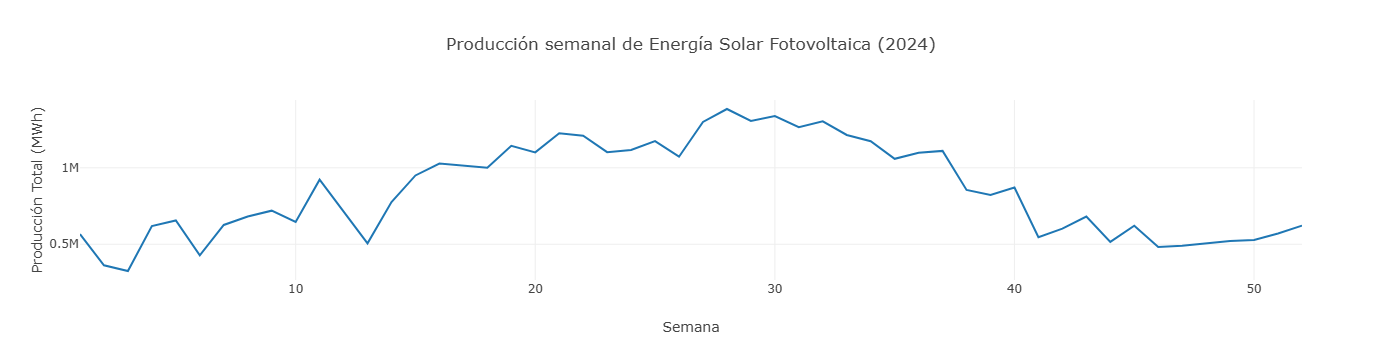

defined function mensual2024

In [45]:
def mensual2024(año: Int): Unit = {
    
// Filtrar los datos del año 2024 y del tipo "Solar fotovoltaica"
  val dfFiltrado = dataFrameBalance
    .filter($"Tipo" === "Solar fotovoltaica" && year($"Fecha") === año)
    .withColumn("Semana", weekofyear($"Fecha")) // Extraer el número de semana
    .groupBy("Semana")
    .agg(sum("Valor").as("Producción Total")) // Sumar la producción por semana
    .orderBy("Semana")


dfFiltrado.show()

// Lista de meses en orden correcto
val semanas = dfFiltrado.select("Semana").as[Int].collect().toSeq


// Asegurar que todos los meses tengan valores (rellenar con 0 si faltan datos)
val produccionMensual =  dfFiltrado.select("Producción Total").as[Double].collect().toSeq


// Crear la traza para la gráfica
val traceSolar = Seq( Scatter(semanas, produccionMensual).withName("Producción Solar Fotovoltaica") )

// Configuración del diseño del gráfico
val lay = Layout()
  .withTitle("Producción semanal de Energía Solar Fotovoltaica (2024)")
  .withXaxis(Axis().withTitle("Semana").withTickmode(TickMode.Array))
  .withYaxis(Axis().withTitle("Producción Total (MWh)"))


// Renderizar el gráfico
plot(traceSolar, lay)

    
}
mensual2024(2024)

+------+--------+------------------+
|Semana|     Mes|  Producción Total|
+------+--------+------------------+
|     1| January|        404326.811|
|     1|December|        162279.894|
|     2| January|362314.96099999995|
|     3| January|325335.36699999997|
|     4| January|        618751.753|
|     5| January|        222272.456|
|     5|February|        433413.088|
|     6|February|        427113.517|
|     7|February|        626221.589|
|     8|February|        681895.349|
|     9|   March|        281330.525|
|     9|February|        438377.448|
|    10|   March| 645588.9280000001|
|    11|   March|        922101.499|
|    12|   March|        715149.309|
|    13|   March|506176.90699999995|
|    14|   April| 775862.0610000001|
|    15|   April|        949792.507|
|    16|   April|1027905.1609999998|
|    17|   April|1012657.4879999999|
+------+--------+------------------+
only showing top 20 rows



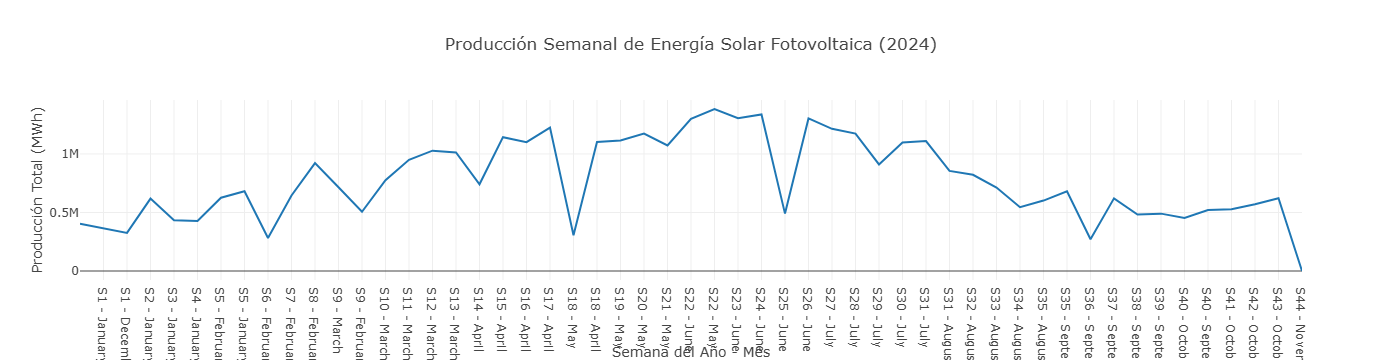

import org.apache.spark.sql.functions._
import plotly._
import plotly.element._
import plotly.layout._
import plotly.Almond._
defined function semanal2024

In [46]:
import org.apache.spark.sql.functions._
import plotly._
import plotly.element._
import plotly.layout._
import plotly.Almond._

def semanal2024(año: Int): Unit = {

  // Filtrar los datos del año y del tipo "Solar fotovoltaica"
  val dfFiltrado = dataFrameBalance
    .filter($"Tipo" === "Solar fotovoltaica" && year($"Fecha") === año)
    .withColumn("Semana", weekofyear($"Fecha")) // Extraer el número de semana
    .withColumn("Mes", date_format($"Fecha", "MMMM")) // Extraer el nombre del mes
    .groupBy("Semana", "Mes")
    .agg(sum("Valor").as("Producción Total")) // Sumar la producción por semana
    .orderBy("Semana")

  dfFiltrado.show()

  // Crear etiquetas para el eje X con "Semana X - Mes"
  val etiquetasSemanas = dfFiltrado.select(
    concat(lit("S"), $"Semana", lit(" - "), $"Mes").as("Etiqueta")
  ).as[String].collect().toSeq

  // Lista de semanas en orden correcto (1 a 53)
  val semanasOrdenadas = dfFiltrado.select("Semana").as[Int].collect().toSeq

  // Asegurar que todas las semanas tengan valores (rellenar con 0 si faltan datos)
  val todasLasSemanas = (1 to 53)
  val produccionSemanal = todasLasSemanas.map { semana =>
    dfFiltrado.filter($"Semana" === semana).select("Producción Total").as[Double].collect().headOption.getOrElse(0.0)
  }

  // Crear la traza para la gráfica
  val traceSolar = Scatter(etiquetasSemanas, produccionSemanal)
    .withName("Producción Solar Fotovoltaica")


  // Configuración del diseño del gráfico
  val lay = Layout()
    .withTitle(s"Producción Semanal de Energía Solar Fotovoltaica ($año)")
    .withXaxis(Axis()
      .withTitle("Semana del Año - Mes")
      .withTickmode(TickMode.Array)
      .withTickvals((1 to etiquetasSemanas.length))
      .withTicktext(etiquetasSemanas) // Muestra etiquetas con "Semana X - Mes"
    )
    .withYaxis(Axis().withTitle("Producción Total (MWh)"))

  // Renderizar el gráfico
  plot(Seq(traceSolar), lay)
}

// Llamar a la función para 2024
semanal2024(2024)


+------+------------------+
|Semana|  Producción Total|
+------+------------------+
|     1| 566606.7050000001|
|     2|362314.96099999995|
|     3|325335.36699999997|
|     4|        618751.753|
|     5|        655685.544|
|     6|        427113.517|
|     7|        626221.589|
|     8|        681895.349|
|     9| 719707.9729999999|
|    10| 645588.9280000001|
|    11|        922101.499|
|    12|        715149.309|
|    13|506176.90699999995|
|    14| 775862.0610000001|
|    15|        949792.507|
|    16|1027905.1609999998|
|    17|1012657.4879999999|
|    18|1000724.1340000001|
|    19|1143593.2619999999|
|    20|       1100780.806|
+------+------------------+
only showing top 20 rows



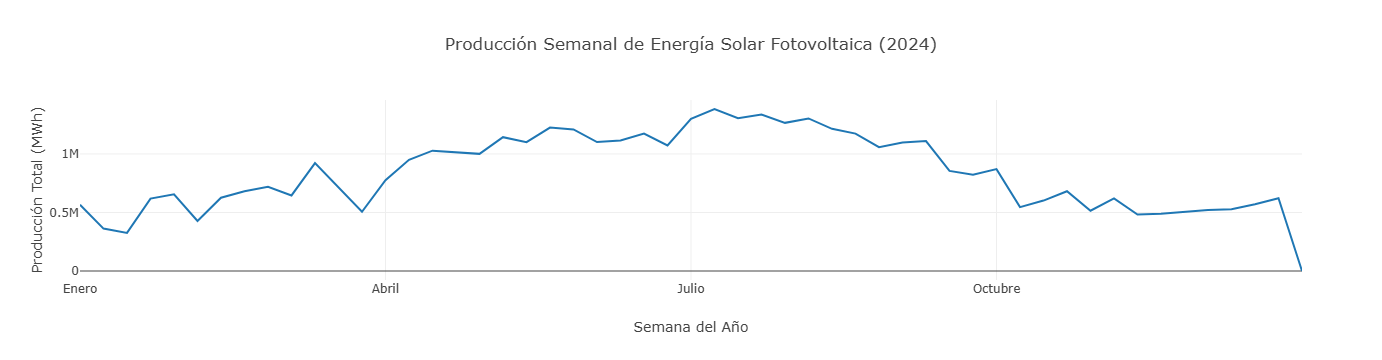

import org.apache.spark.sql.functions._
import plotly._
import plotly.element._
import plotly.layout._
import plotly.Almond._
defined function semanal2024

In [47]:
import org.apache.spark.sql.functions._
import plotly._
import plotly.element._
import plotly.layout._
import plotly.Almond._

def semanal2024(año: Int): Unit = {

  // Filtrar los datos del año y del tipo "Solar fotovoltaica"
  val dfFiltrado = dataFrameBalance
    .filter($"Tipo" === "Solar fotovoltaica" && year($"Fecha") === año)
    .withColumn("Semana", weekofyear($"Fecha")) // Extraer el número de semana
    .groupBy("Semana")
    .agg(sum("Valor").as("Producción Total")) // Sumar la producción por semana
    .orderBy("Semana")

  dfFiltrado.show()

  // Lista de semanas en orden correcto (1 a 53)
  val semanasOrdenadas = dfFiltrado.select("Semana").as[Int].collect().toSeq

  // Asegurar que todas las semanas tengan valores (rellenar con 0 si faltan datos)
  val todasLasSemanas = (1 to 53)
  val produccionSemanal = todasLasSemanas.map { semana =>
    dfFiltrado.filter($"Semana" === semana).select("Producción Total").as[Double].collect().headOption.getOrElse(0.0)
  }

  // Crear la traza para la gráfica
  val traceSolar = Scatter(todasLasSemanas, produccionSemanal)
    .withName("Producción Solar Fotovoltaica")
    
  // Configuración del diseño del gráfico con meses en el eje X
  val lay = Layout()
    .withTitle(s"Producción Semanal de Energía Solar Fotovoltaica ($año)")
    .withXaxis(Axis()
      .withTitle("Semana del Año")
      .withTickmode(TickMode.Array)
      .withTickvals(Seq(1, 14, 27, 40)) // Posición aproximada de los meses en las semanas
      .withTicktext(Seq("Enero", "Abril", "Julio", "Octubre")) // Texto de los meses
    )
    .withYaxis(Axis().withTitle("Producción Total (MWh)"))

  // Renderizar el gráfico
  plot(Seq(traceSolar), lay)
}

// Llamar a la función para 2024
semanal2024(2024)
